
Student grades prediction

Project Description


The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams


CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


Dataset Link-

•  https://github.com/dsrscientist/dataset4

•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
dataset = pd.read_csv('grades.csv')
dataset

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
dataset.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
dataset .shape

(571, 43)

Here we have total 571 rows and 43 columns in which CGPA is a target variable.

In [5]:
# checking the duplicates
dataset.duplicated().sum()

0

There are no Duplicate values in this dataset.


In [6]:
# Checking the null values
dataset.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

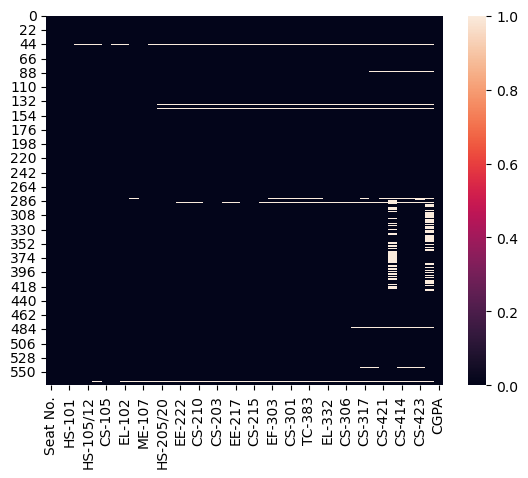

In [7]:
sns.heatmap(dataset.isnull())
plt.show()

Here we can clearly see that this dataset has lots of missing values, we need to handle that values.

In [8]:
data = dataset.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [9]:
data["CGPA"].nunique()

491

In this dataset all the input variable is in object format and target variable in numerical format

## EDA

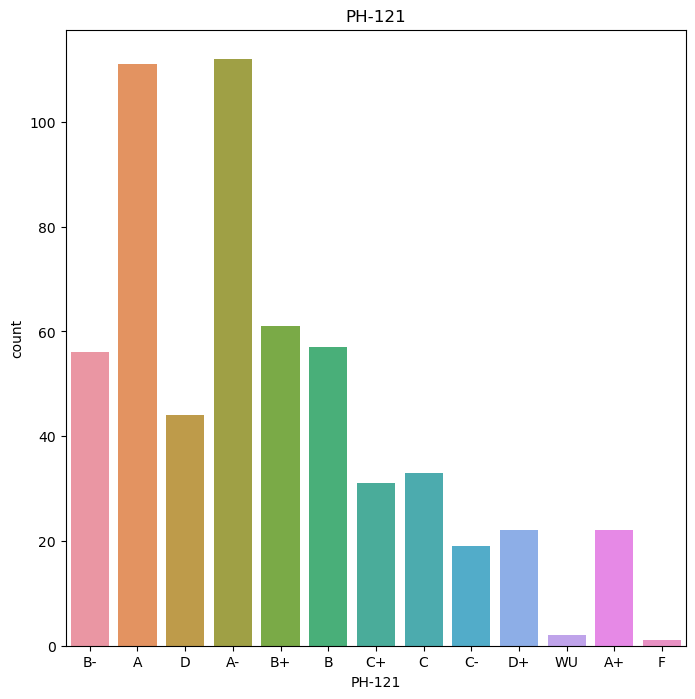

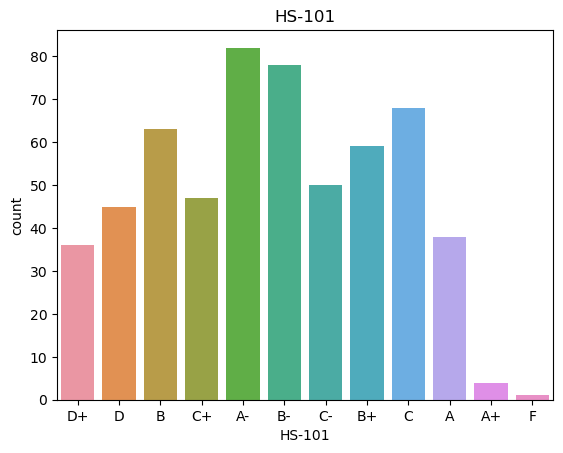

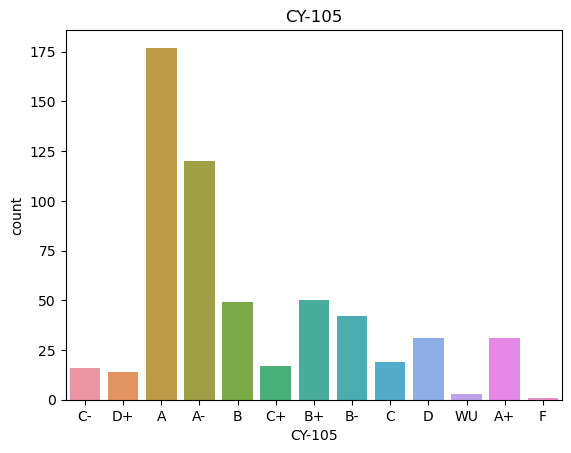

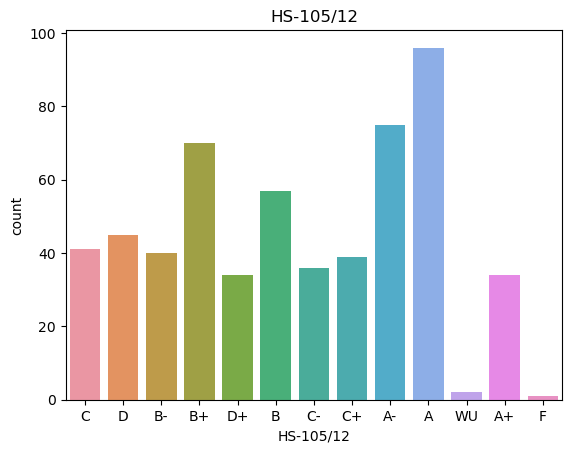

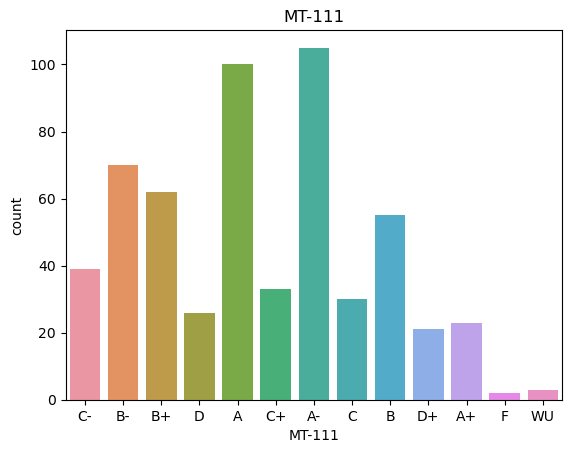

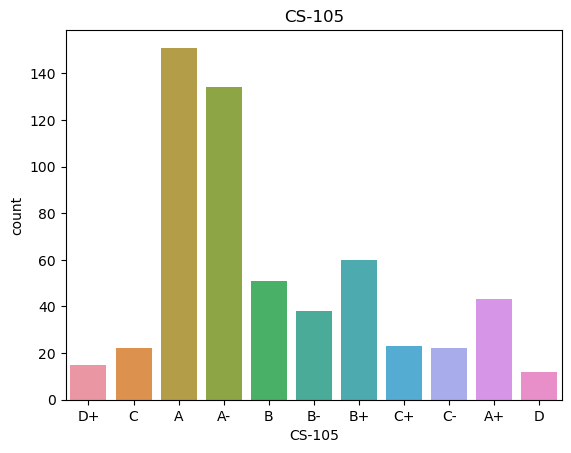

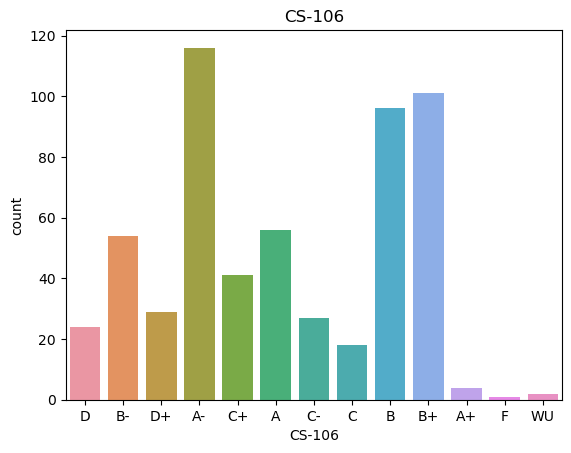

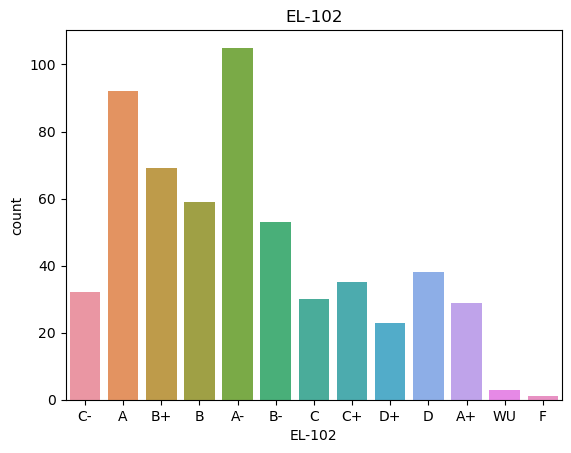

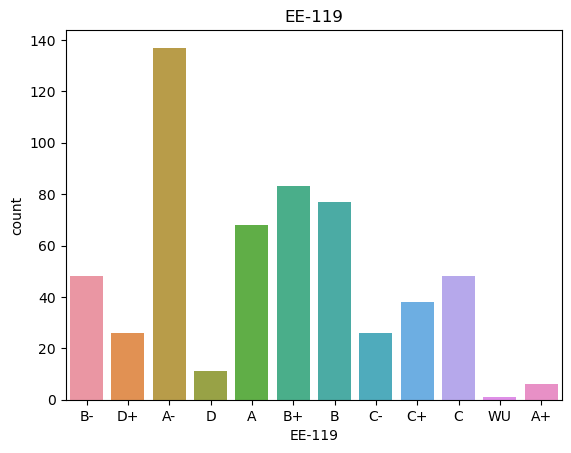

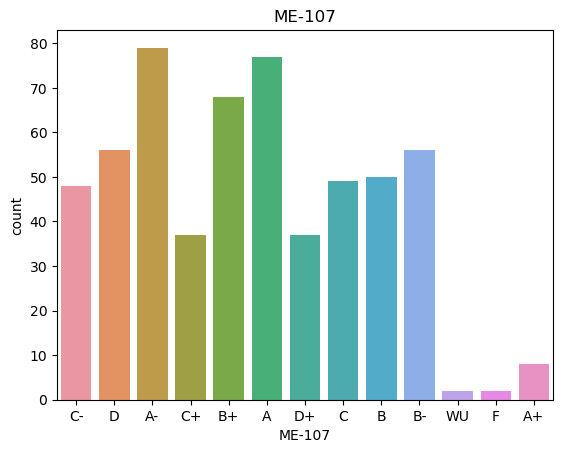

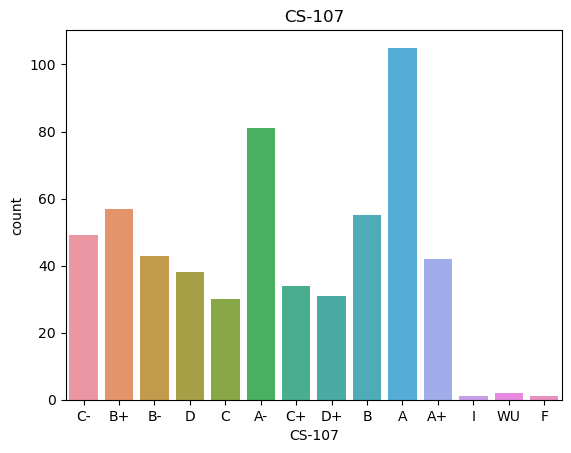

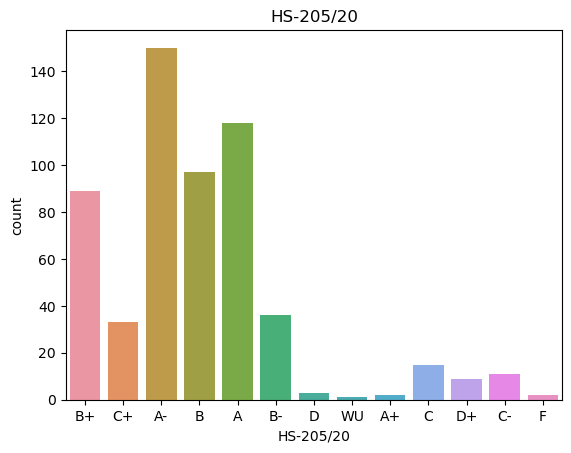

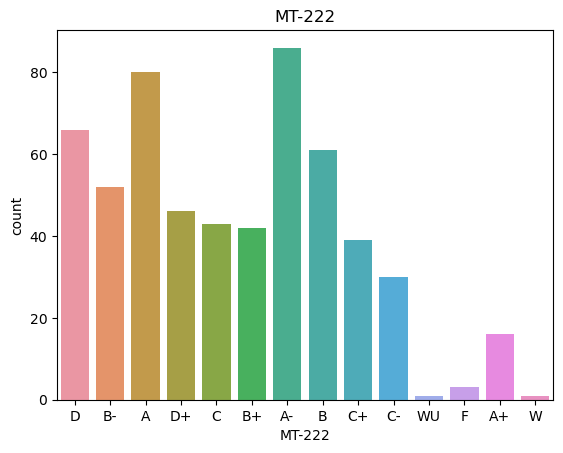

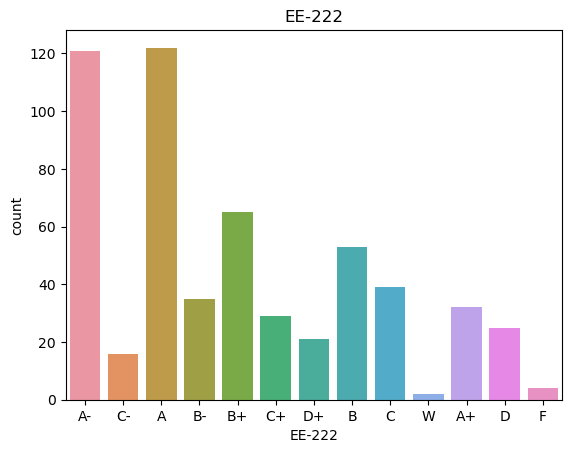

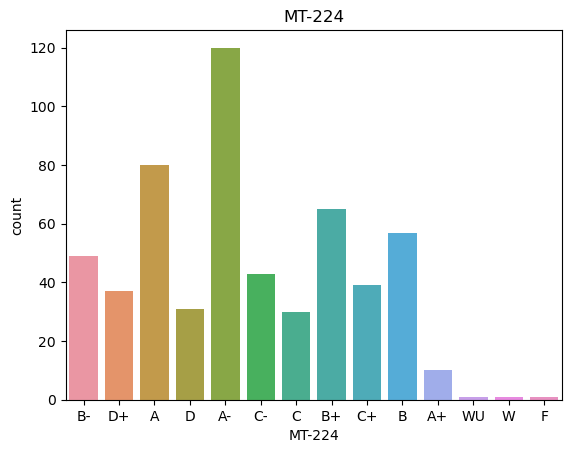

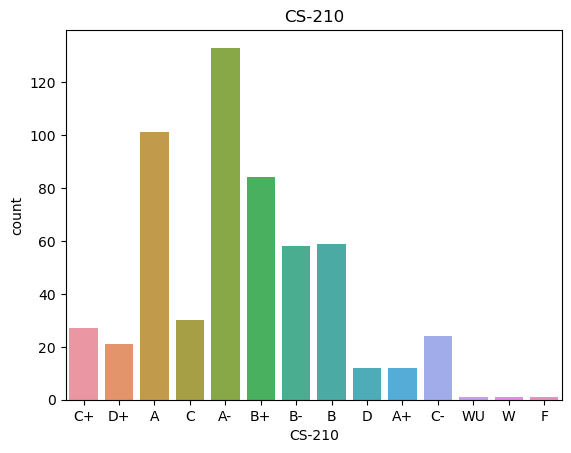

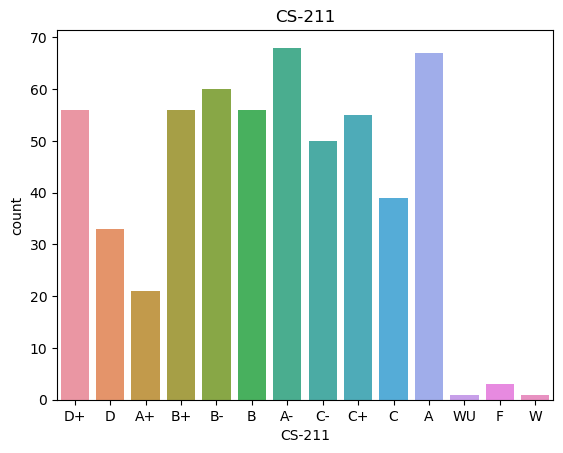

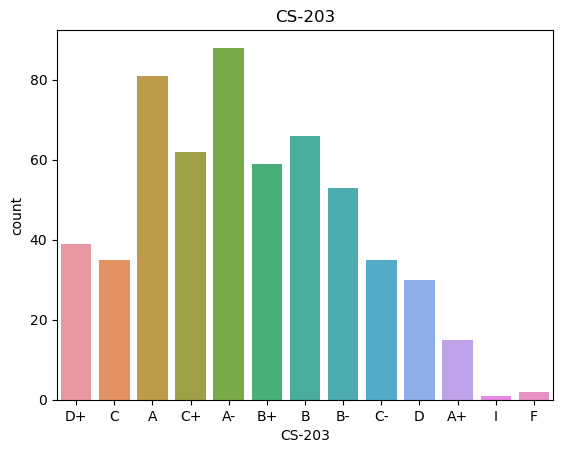

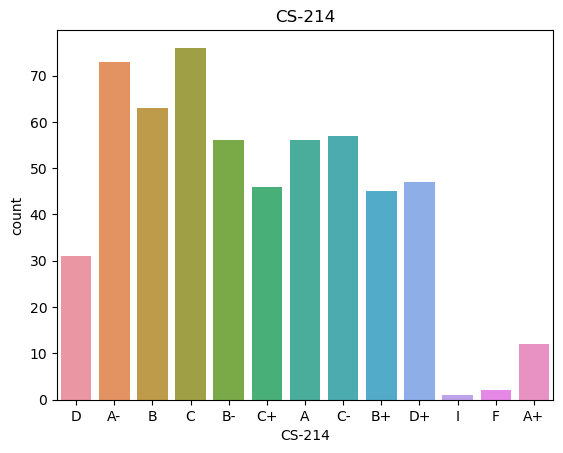

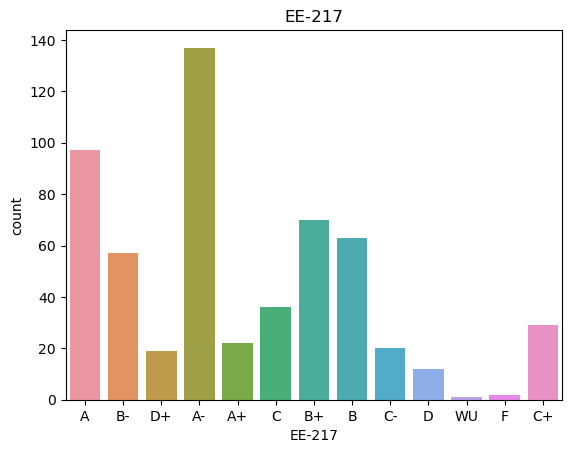

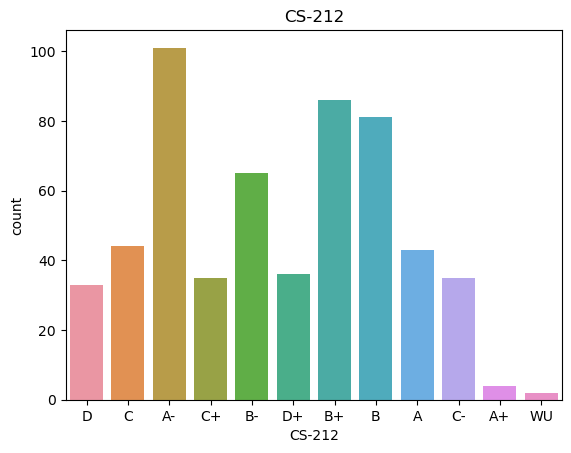

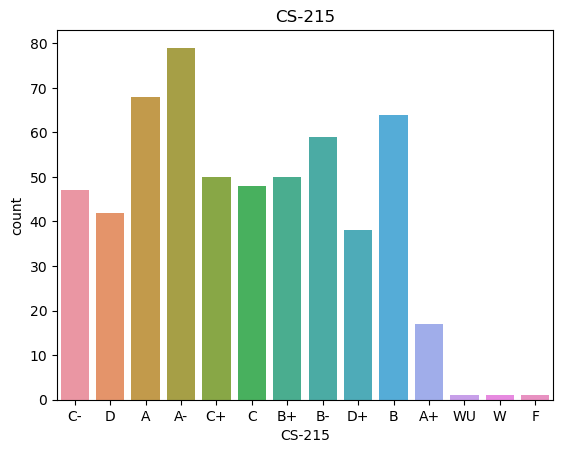

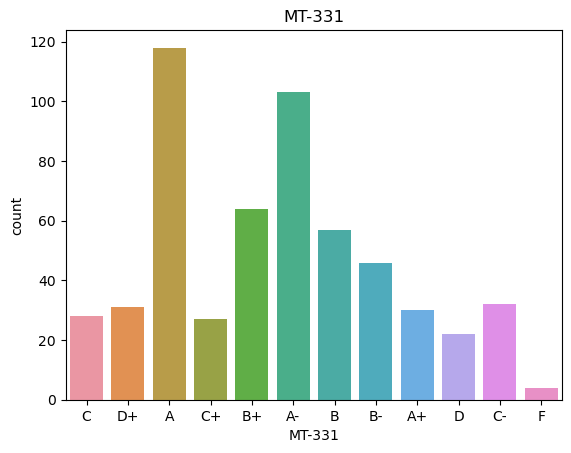

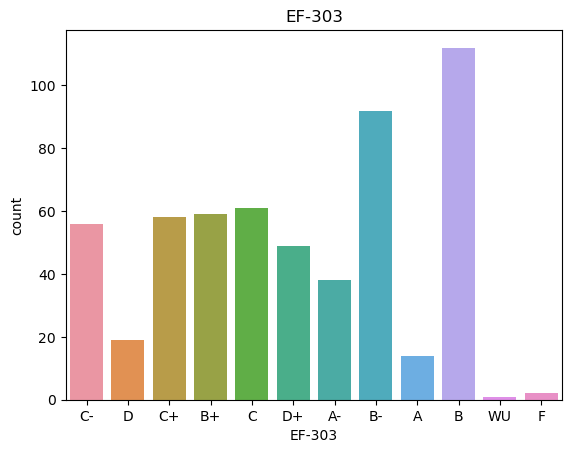

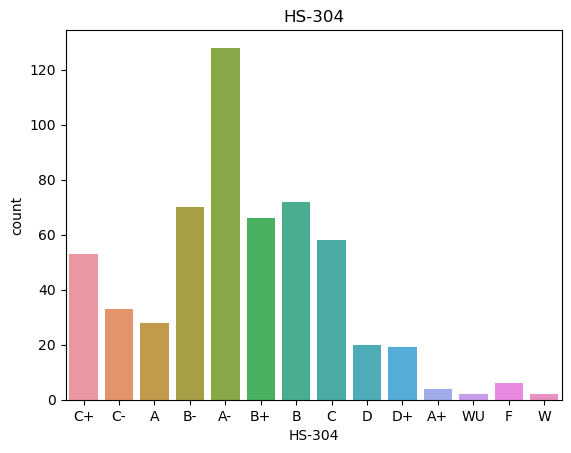

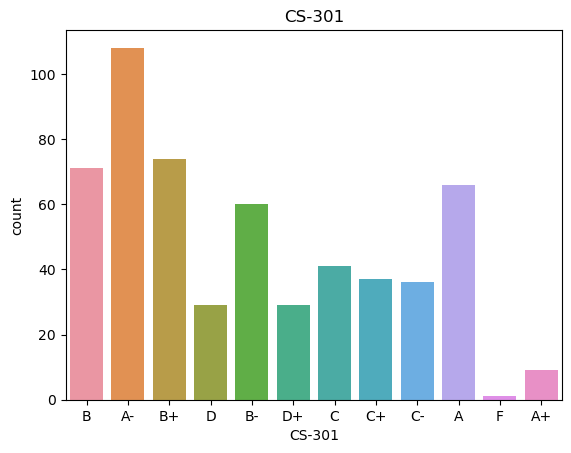

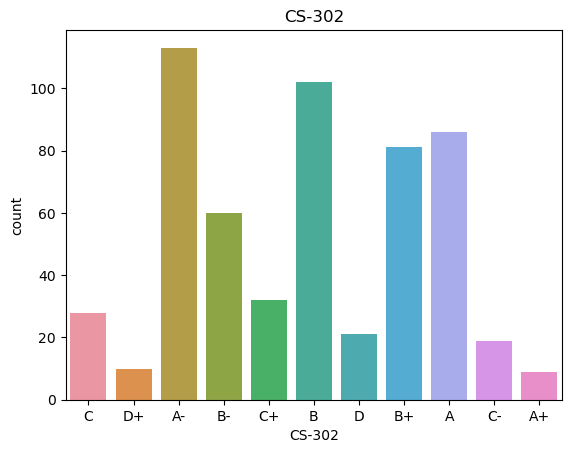

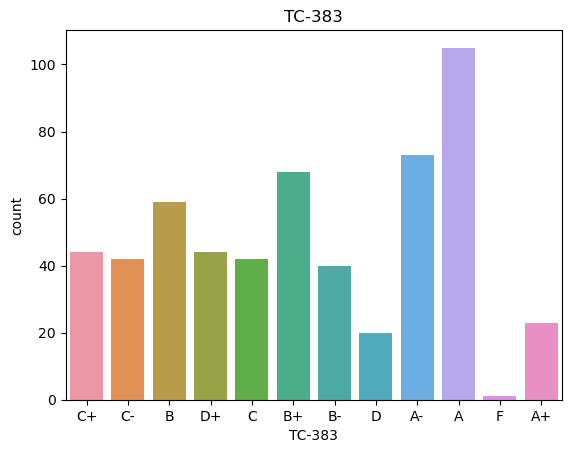

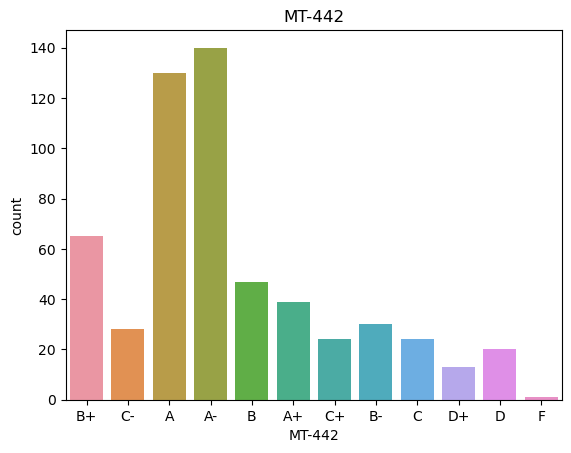

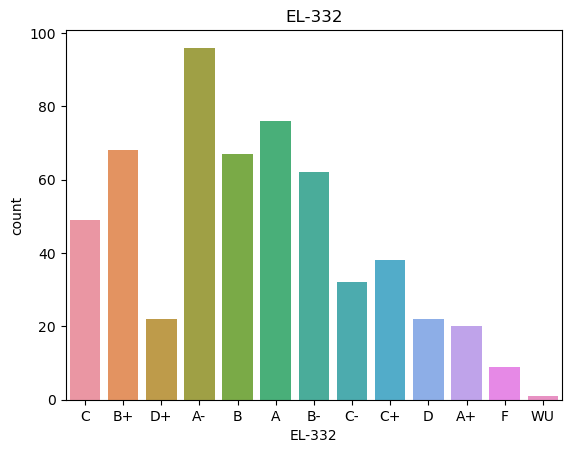

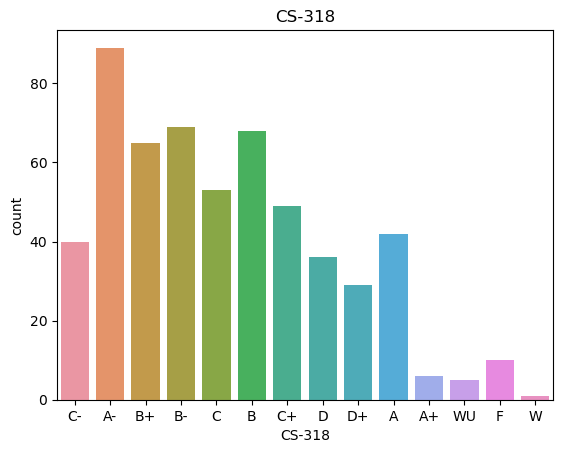

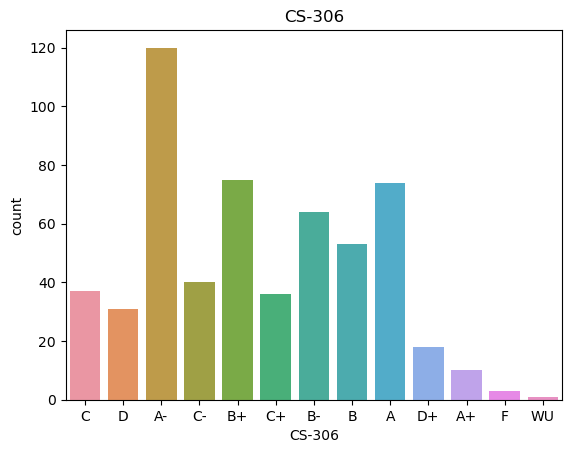

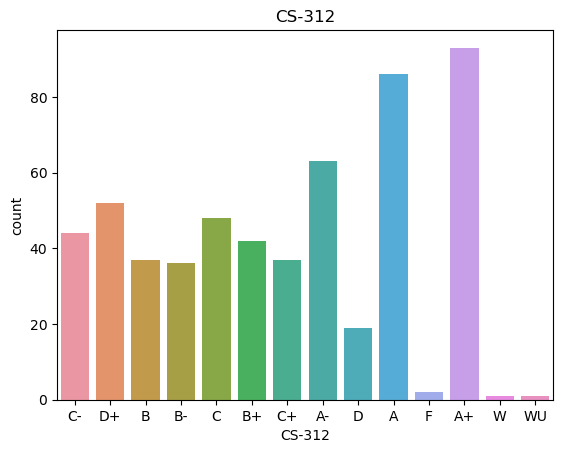

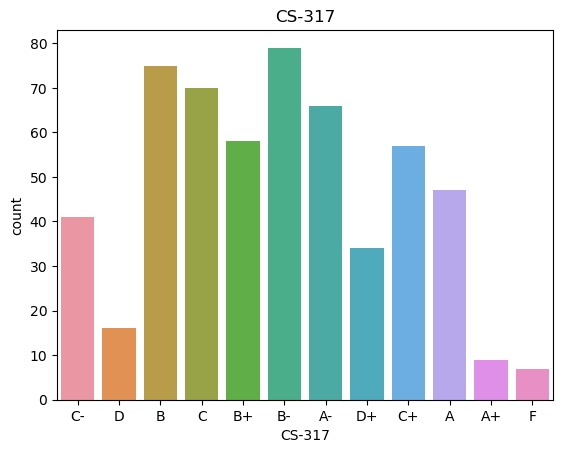

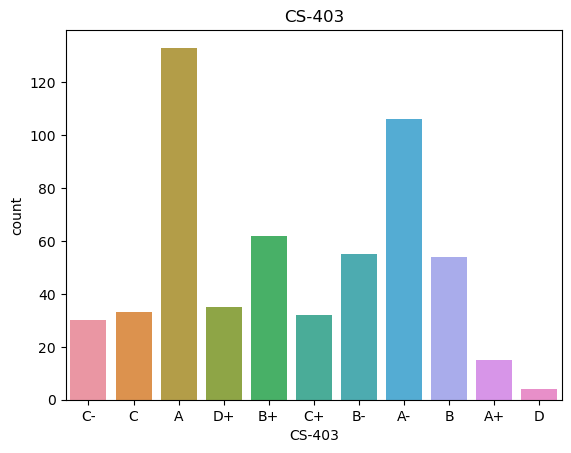

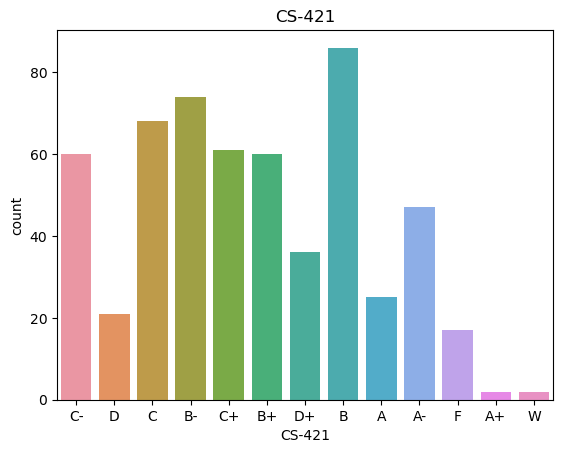

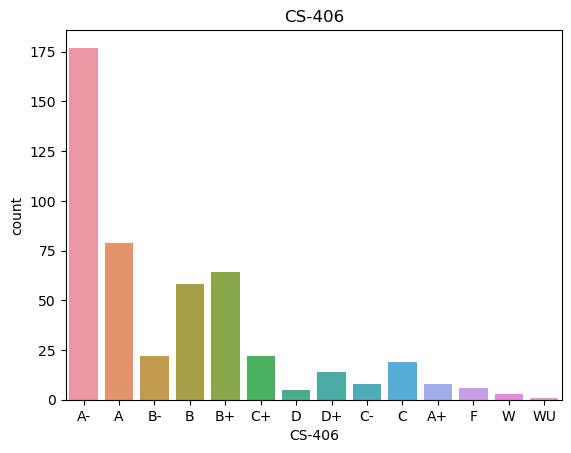

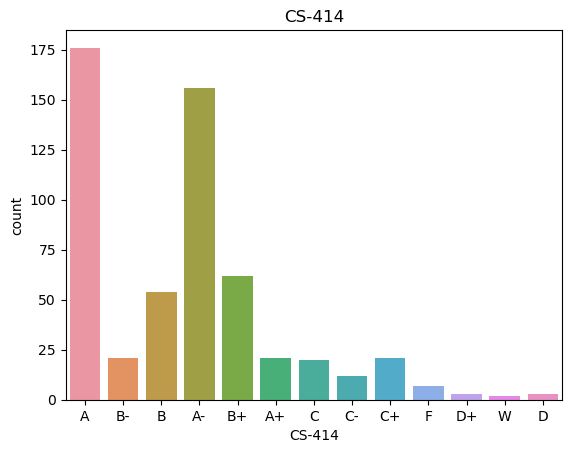

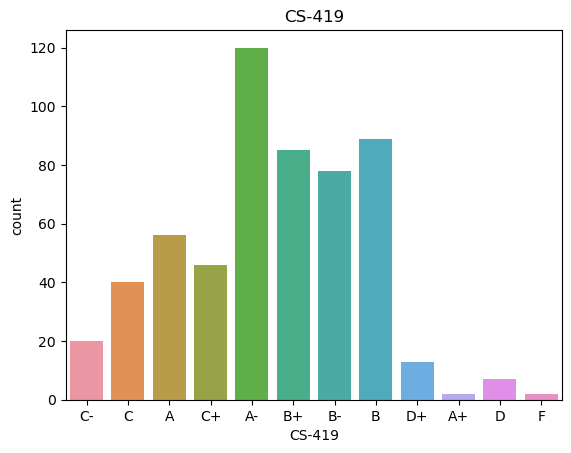

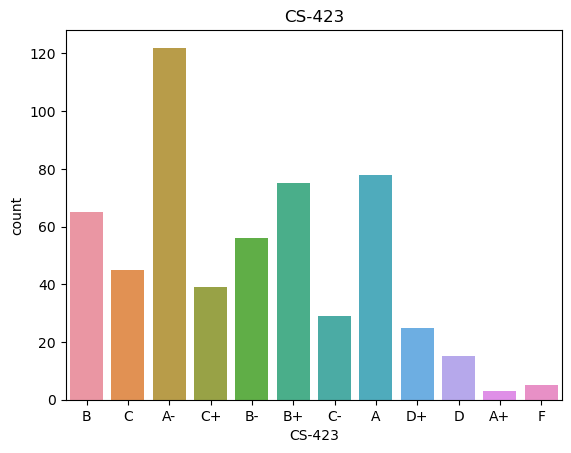

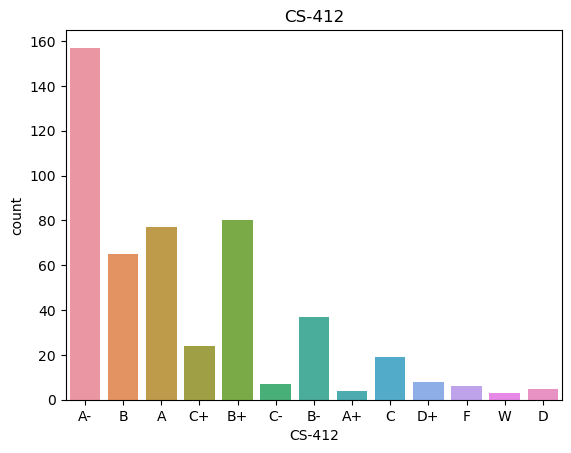

In [10]:
# since we have all caterigal values
plt.figure(figsize = (8,8))
for i in data.columns[1:-1]:
    sns.countplot(data[i])
    plt.title(i)
    plt.xlabel(i)
    plt.show()

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

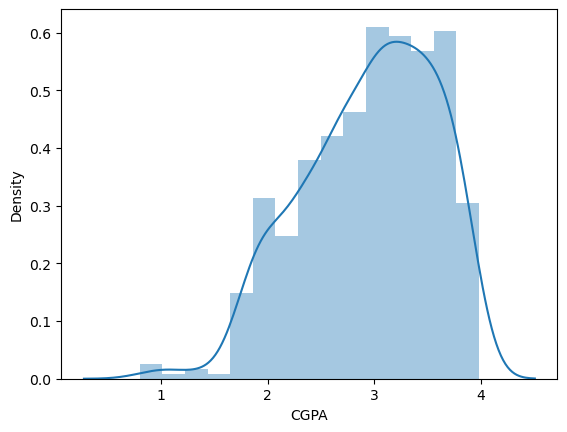

In [11]:
sns.distplot(data['CGPA'])

Since the seat no does not contribute to the CGPA.we will drop it.

In [15]:
data1=data.copy()
data1.drop("Seat No.",axis = 1 ,inplace = True)

In [16]:
;data1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [18]:
data1.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

As we know All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

We need to rename the columns with inconsistant names.

In [19]:
data1.rename(columns = {'HS-105/12':'HS-105','HS-205/20':'HS-205'},inplace =True)

In [20]:
data1.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [26]:
#Let's handle the missing values with mode
for i in data1.columns:
    data1[i].replace(np.NaN,data1[i].mode()[0],inplace =True)

In [27]:
data1.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  571 non-null    object 
 1   HS-101  571 non-null    object 
 2   CY-105  571 non-null    object 
 3   HS-105  571 non-null    object 
 4   MT-111  571 non-null    object 
 5   CS-105  571 non-null    object 
 6   CS-106  571 non-null    object 
 7   EL-102  571 non-null    object 
 8   EE-119  571 non-null    object 
 9   ME-107  571 non-null    object 
 10  CS-107  571 non-null    object 
 11  HS-205  571 non-null    object 
 12  MT-222  571 non-null    object 
 13  EE-222  571 non-null    object 
 14  MT-224  571 non-null    object 
 15  CS-210  571 non-null    object 
 16  CS-211  571 non-null    object 
 17  CS-203  571 non-null    object 
 18  CS-214  571 non-null    object 
 19  EE-217  571 non-null    object 
 20  CS-212  571 non-null    object 
 21  CS-215  571 non-null    object 
 22  MT

Now our dataset has no missing values.

In [31]:
# Removing records with inconsistent grades
# locates records with Wu and W then drops by their indices
df = data1.copy() 
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)

In [32]:
df.reset_index(drop=True,inplace=True)

In [33]:
df.shape

(547, 42)

In [34]:
DF = df.copy()
for column in DF.columns:
    
    DF[column]=DF[column].replace('A+',4.0)
    DF[column]=DF[column].replace('A',4.0)
    DF[column]=DF[column].replace('A-',3.7)
    DF[column]=DF[column].replace('B+',3.4)
    DF[column]=DF[column].replace('B',3.0)
    DF[column]=DF[column].replace('B-',2.7)
    DF[column]=DF[column].replace('C+',2.4)
    DF[column]=DF[column].replace('C',2.0)
    DF[column]=DF[column].replace('C-',1.7)
    DF[column]=DF[column].replace('D+',1.4)
    DF[column]=DF[column].replace('D',1.0)
    DF[column]=DF[column].replace('F',0.0)

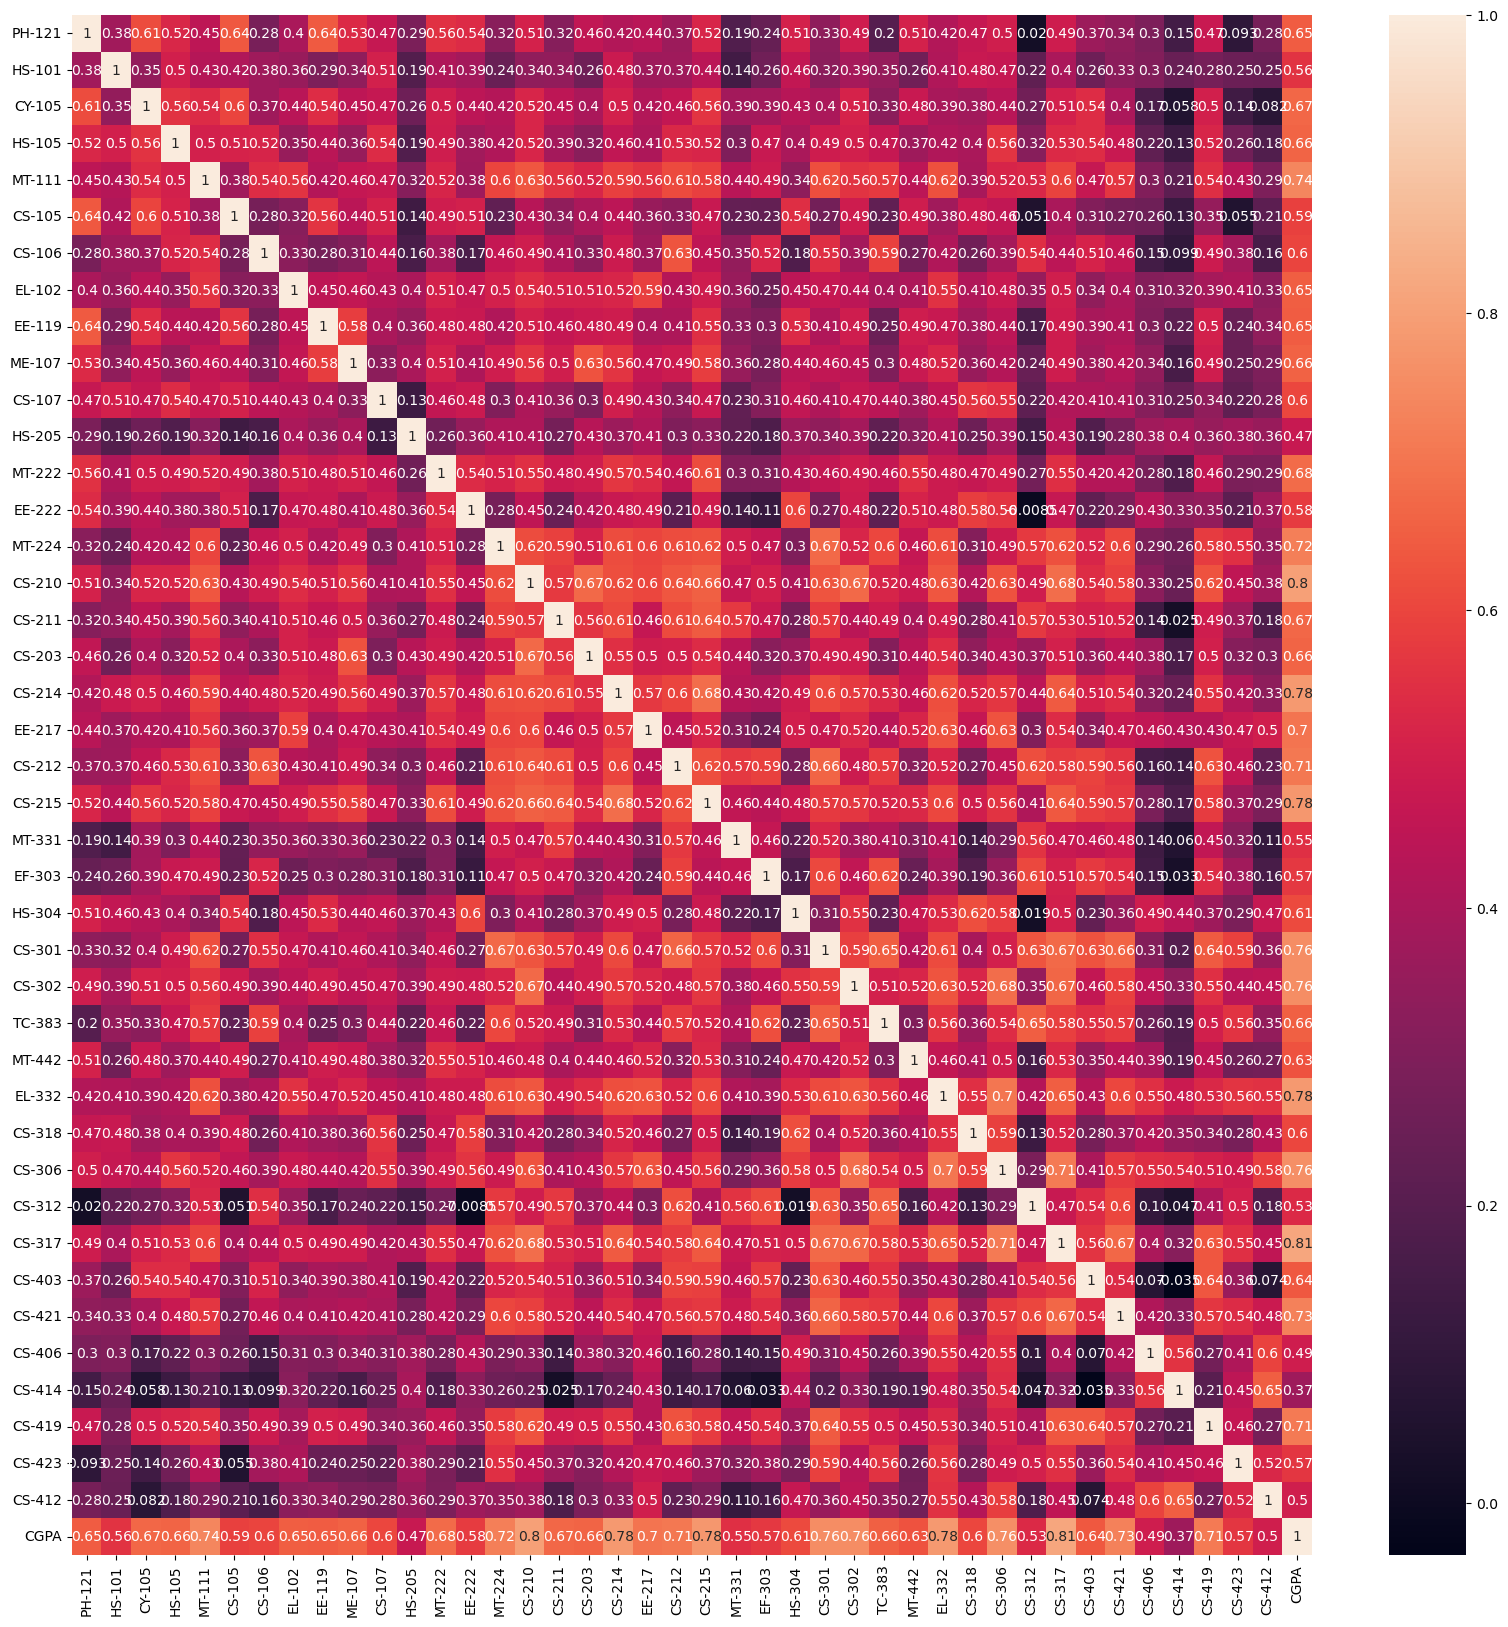

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(DF.corr(),annot=True)
plt.show()
# the heat map looks complicated but just focus on the last column the correlation of all the course GPAs are pretty strong as it should be.

In [36]:
# Lets make the target variable seperate
DF.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [40]:
x= DF.iloc[:,:-1]
y= DF.iloc[:,-1]

In [41]:
x.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0


In [42]:
y.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [43]:
#traon test split
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x = st.fit_transform(x)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .20)

In [57]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape )

(437, 41) (110, 41) (437,) (110,)


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,r2_score

In [68]:
models  = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "Decision Tree":DecisionTreeRegressor(),
    "SVR":SVR(),
}
for i in range(len(list(models))):
  #training the model
    model = list(models.values())[i]
    model.fit(x_train,y_train)
  #prediction   
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
  #training performance
    model_train_MSE = mean_squared_error(y_train,y_train_pred)
    model_train_RMSE = np.sqrt(mean_squared_error(y_train,y_train_pred))
    model_train_mean_absolute_error = mean_absolute_error(y_train,y_train_pred)
    r2_score_train = r2_score(y_train,y_train_pred)
    
  #testing performance
    model_test_MSE = mean_squared_error(y_test,y_test_pred)
    model_test_RMSE= np.sqrt(mean_squared_error(y_test,y_test_pred))
    model_test_mean_absolute_error = mean_absolute_error(y_test,y_test_pred)
    r2_score_test = r2_score(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])
    
    print("* Model performace for training set")
    print("MSE Score :",model_train_MSE)
    print("RMSE Score :",model_train_RMSE)
    print("MAE : ",model_train_mean_absolute_error)
    print("r2_score",r2_score_train)
    
    
    print("\n")
    print("* Model performace for testing set ")
    print("MSE Score :",model_test_MSE)
    print("RMSE : ",model_test_RMSE)
    print("MAE : ",model_test_mean_absolute_error)
    print("r2_score",r2_score_test)

   
    
    print(" --------------------------------------------------- ")
    print("\n")

LinearRegression
* Model performace for training set
MSE Score : 0.011661304753239773
RMSE Score : 0.10798752128482149
MAE :  0.05072420477935097
r2_score 0.9661099289378288


* Model performace for testing set 
MSE Score : 0.005983252998567465
RMSE :  0.07735148995699737
MAE :  0.05154614270794946
r2_score 0.9826689370391876
 --------------------------------------------------- 


Ridge
* Model performace for training set
MSE Score : 0.011661526823832978
RMSE Score : 0.10798854950332919
MAE :  0.05048563646527577
r2_score 0.9661092835565147


* Model performace for testing set 
MSE Score : 0.005940991668558883
RMSE :  0.07707782864455176
MAE :  0.05128535989961979
r2_score 0.9827913510122155
 --------------------------------------------------- 


ElasticNet
* Model performace for training set
MSE Score : 0.3440920714461509
RMSE Score : 0.5865936169497167
MAE :  0.4863013787578089
r2_score 0.0


* Model performace for testing set 
MSE Score : 0.3456855180483363
RMSE :  0.587950268346172

As we can see the Linear Regression and Ridge Regression has very good r2 score.

Tunning the model with GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
alphaValues = {"alpha":[1,0.1,0.01,0.001,0.0001,0]}
model = Ridge()
grid = GridSearchCV(estimator = model,param_grid = alphaValues)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.9498011905840095
1
{'alpha': 1}


saving the best model

In [74]:
rid = Ridge(alpha = 1)
rid.fit(x_train,y_train)
p = rid.predict(x_test )
print(r2_score(y_test,p))

0.9827913510122155


In [75]:
import joblib
joblib.dump(rid,"studen_grade_prediction_Ridge.obj")

['studen_grade_prediction_Ridge.obj']